   Wavelength        I  Incrament  Unnamed: 3  Ambient air
0   433.67000  0.40417    0.00005         NaN          NaN
1   433.67005  0.40386        NaN         NaN          NaN
2   433.67010  0.40394        NaN         NaN          NaN
3   433.67015  0.40400        NaN         NaN          NaN
4   433.67020  0.40404        NaN         NaN          NaN


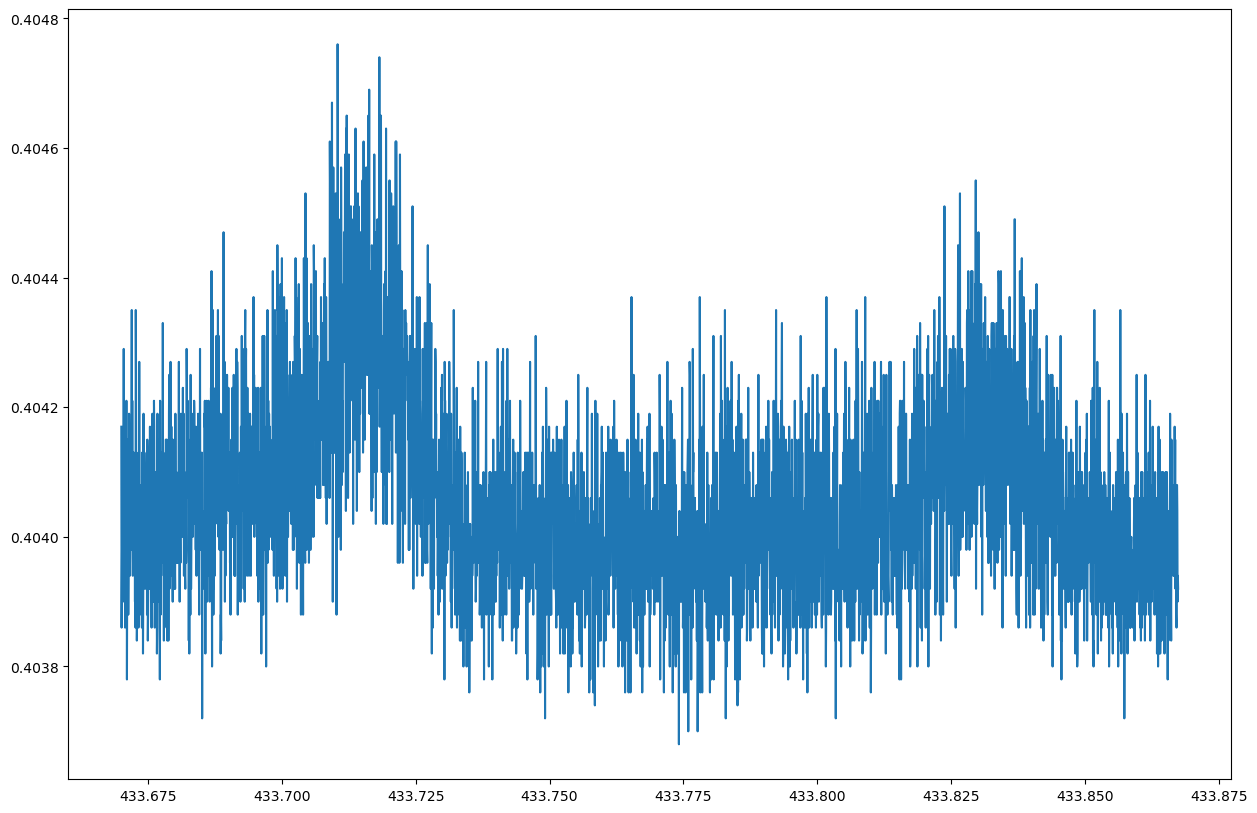

In [7]:
#### # Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting
from scipy.optimize import curve_fit # curve fit class


##############
# Import data
##############

df_H2D2 = pd.read_csv("H2D2_Spectra_434.csv") # create pandas dataframe
print(df_H2D2.head()) # print first 5 rows


##############
# Plot data
##############

x_H2D2 = df_H2D2["Wavelength"] # grab column
y_H2D2 = df_H2D2["I"] # grab column
plt.figure(figsize=(15,10))
plt.plot(x_H2D2, y_H2D2)
plt.show()

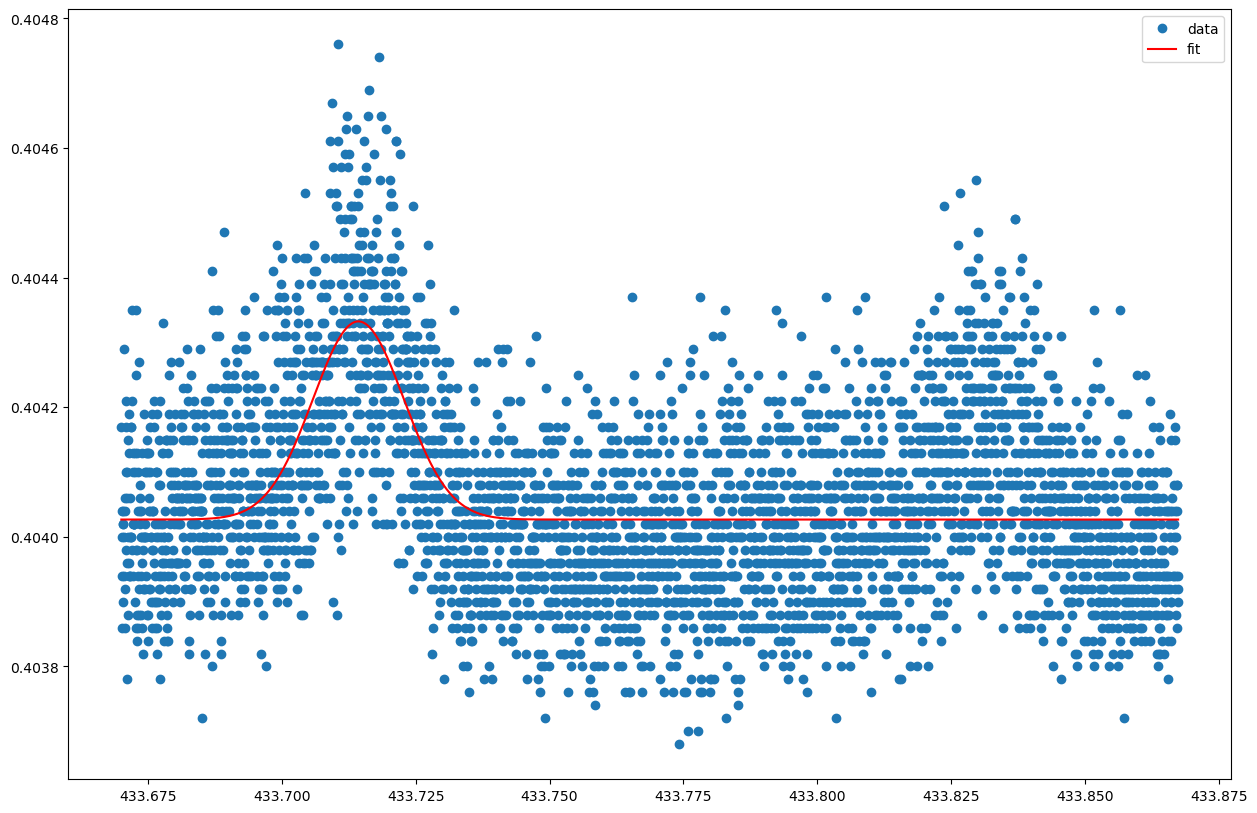

In [2]:
########################
# Input constant values
########################

a_H2 = 0.002 # amplitude                   
mean_H2 = 433.7125 # middle of graph                 
h_H2 = .403 # vertical shift                  
sigma_H2 = 0.025 # width displacement


################################
# Define the Gaussian function
# takes in constants, solves 
# equation, returns value
################################

def gaus(x_H2D2, a_H2, mean_H2, sigma_H2, h_H2):
    fit = a_H2*np.exp((-(x_H2D2-mean_H2)**2)/(2*sigma_H2**2)) + h_H2
    return fit


#####################
# Fit the data using
# curve fit class
#####################

popt_H2, pcov_H2 = curve_fit(gaus, x_H2D2, y_H2D2, p0=[a_H2, mean_H2, sigma_H2, h_H2]) # solves for a, mean, sigma, h
y_H2_fit = gaus(x_H2D2, *popt_H2) # creates y(x) = gaus function with fitted values


#################
# Plot Fit Curve
#################

plt.figure(figsize=(15,10))
plt.plot(x_H2D2, y_H2D2, 'o', label="data")
plt.plot(x_H2D2, y_H2_fit, 'r-', label='fit')
plt.legend()
plt.show()

In [3]:
#####################
# Print fit data
# Print uncertainty
#####################
print("Fit Amplitude: ", popt_H2[0],
      "\n Fit Mean (Wavelength): ", popt_H2[1],
      "\n Fit Sigma (distance from mean to sides): ", popt_H2[2],
      "\n Fit Height: ", popt_H2[3])

print("\n Uncertainty matrix (uncertainties lie along diagonal): \n", pcov_H2)

Fit Amplitude:  0.0003057257846849679 
 Fit Mean (Wavelength):  433.7142810287651 
 Fit Sigma (distance from mean to sides):  0.008508563275483903 
 Fit Height:  0.40402673862041816

 Uncertainty matrix (uncertainties lie along diagonal): 
 [[ 8.58919443e-11  1.17128775e-12 -1.38967922e-09 -3.88318359e-12]
 [ 1.17128775e-12  8.58475762e-08 -3.25912203e-11 -1.82723308e-16]
 [-1.38967922e-09 -3.25912203e-11  9.43524958e-08 -2.16115406e-10]
 [-3.88318359e-12 -1.82723308e-16 -2.16115406e-10  5.49161257e-12]]


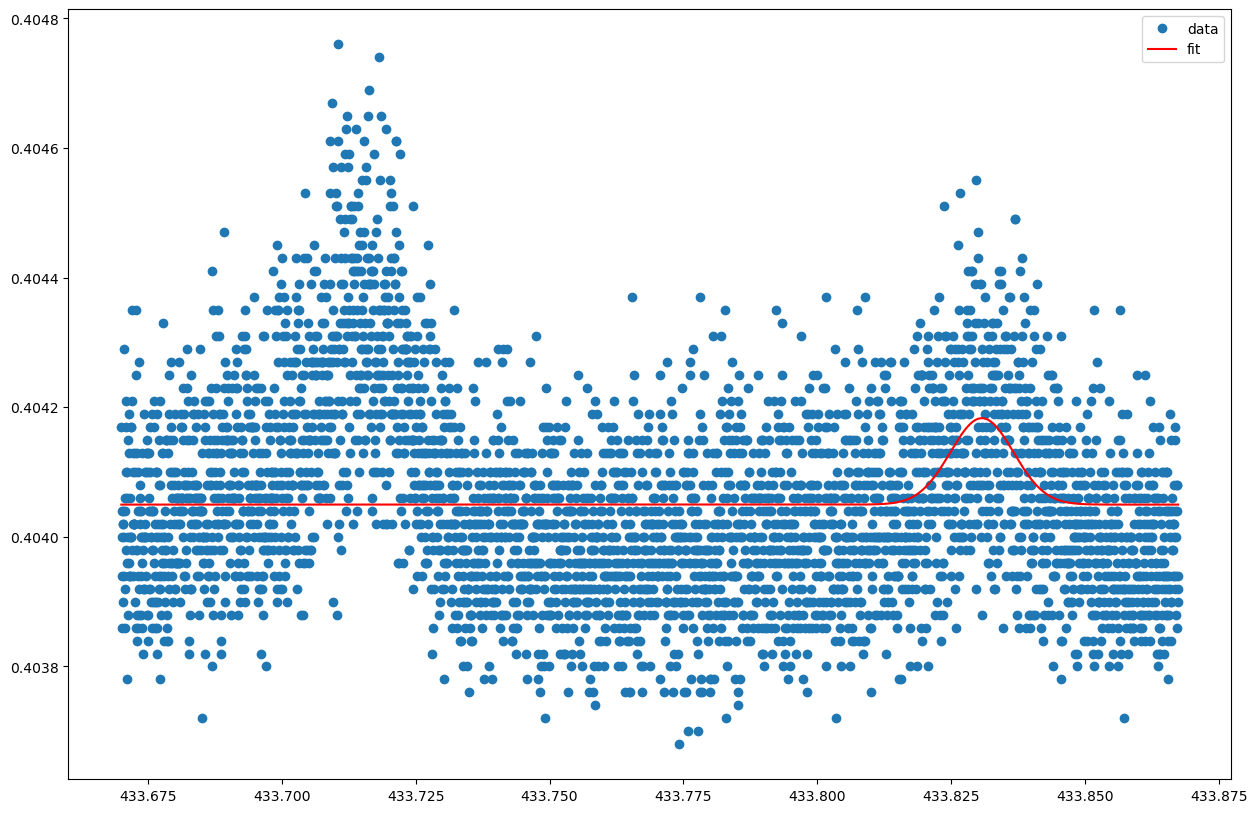

In [5]:
########################
# Input constant values
########################

a_D2 = 0.001 # amplitude                   
mean_D2 = 433.835 # middle of graph                 
h_D2 = .403 # vertical shift                  
sigma_D2 = 0.025 # width displacement


################################
# Define the Gaussian function
# takes in constants, solves 
# equation, returns value
################################

def gaus(x_D2, a_D2, mean_D2, sigma_D2, h_D2):
    fit = a_D2*np.exp((-(x_H2D2-mean_D2)**2)/(2*sigma_D2**2)) + h_D2
    return fit


#####################
# Fit the data using
# curve fit class
#####################

popt_D2, pcov_D2 = curve_fit(gaus, x_H2D2, y_H2D2, p0=[a_D2, mean_D2, sigma_D2, h_D2]) # solves for a, mean, sigma, h
y_D2_fit = gaus(x_H2D2, *popt_D2) # creates y(x) = gaus function with fitted values


#################
# Plot Fit Curve
#################

plt.figure(figsize=(15,10))
plt.plot(x_H2D2, y_H2D2, 'o', label="data")
plt.plot(x_H2D2, y_D2_fit, 'r-', label='fit')
plt.legend()
plt.show()

In [6]:
#####################
# Print fit data
# Print uncertainty
#####################
print("Fit Amplitude: ", popt_D2[0],
      "\n Fit Mean (Wavelength): ", popt_D2[1],
      "\n Fit Sigma (distance from mean to sides): ", popt_D2[2],
      "\n Fit Height: ", popt_D2[3])

print("\n Uncertainty matrix (uncertainties lie along diagonal): \n", pcov_D2)

Fit Amplitude:  0.00013334217875675882 
 Fit Mean (Wavelength):  433.8307473764934 
 Fit Sigma (distance from mean to sides):  -0.005886305041565257 
 Fit Height:  0.4040497977483597

 Uncertainty matrix (uncertainties lie along diagonal): 
 [[ 1.60868884e-10  5.10928559e-12  4.34920087e-09 -4.66721408e-12]
 [ 5.10928559e-12  4.10053120e-07  2.25824668e-10  1.74759830e-16]
 [ 4.34920087e-09  2.25824668e-10  4.35817231e-07  4.12388892e-10]
 [-4.66721408e-12  1.74759830e-16  4.12388892e-10  6.60047908e-12]]
